In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
text = """
1609

THE SONNETS

by William Shakespeare



                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy lusty days;
  To say within thine own deep sunken eyes,
  Were an all-eating shame, and thriftless praise.
  How much more praise deserved thy beauty's use,
  If thou couldst answer 'This fair child of mine
  Shall sum my count, and make my old excuse'
  Proving his beauty by succession thine.
    This were to be new made when thou art old,
    And see thy blood warm when thou feel'st it cold.


                     3
  Look in thy glass and tell the face thou viewest,
  Now is the time that face should form another,
  Whose fresh repair if now thou not renewest,
  Thou dost beguile the world, unbless some mother.
  For where is she so fair whose uneared womb
  Disdains the tillage of thy husbandry?
  Or who is he so fond will be the tomb,
  Of his self-love to stop posterity?
  Thou art thy mother's glass and she in thee
  Calls back the lovely April of her prime,
  So thou through windows of thine age shalt see,
  Despite of wrinkles this thy golden time.
    But if thou live remembered not to be,
    Die single and thine image dies with thee.


                     4
  Unthrifty loveliness why dost thou spend,
  Upon thy self thy beauty's legacy?
  Nature's bequest gives nothing but doth lend,
  And being frank she lends to those are free:
  Then beauteous niggard why dost thou abuse,
  The bounteous largess given thee to give?
  Profitless usurer why dost thou use
  So great a sum of sums yet canst not live?
  For having traffic with thy self alone,
  Thou of thy self thy sweet self dost deceive,
  Then how when nature calls thee to be gone,
  What acceptable audit canst thou leave?
    Thy unused beauty must be tombed with thee,
    Which used lives th' executor to be.


                     5
  Those hours that with gentle work did frame
  The lovely gaze where every eye doth dwell
  Will play the tyrants to the very same,
  And that unfair which fairly doth excel:
  For never-resting time leads summer on
  To hideous winter and confounds him there,
  Sap checked with frost and lusty leaves quite gone,
  Beauty o'er-snowed and bareness every where:
  Then were not summer's distillation left
  A liquid prisoner pent in walls of glass,
  Beauty's effect with beauty were bereft,
  Nor it nor no remembrance what it was.
    But flowers distilled though they with winter meet,
    Leese but their show, their substance still lives sweet.


                     6
  Then let not winter's ragged hand deface,
  In thee thy summer ere thou be distilled:
  Make sweet some vial; treasure thou some place,
  With beauty's treasure ere it be self-killed:
  That use is not forbidden usury,
  Which happies those that pay the willing loan;
  That's for thy self to breed another thee,
  Or ten times happier be it ten for one,
  Ten times thy self were happier than thou art,
  If ten of thine ten times refigured thee:
  Then what could death do if thou shouldst depart,
  Leaving thee living in posterity?
    Be not self-willed for thou art much too fair,
    To be death's conquest and make worms thine heir.


                     7
  Lo in the orient when the gracious light
  Lifts up his burning head, each under eye
  Doth homage to his new-appearing sight,
  Serving with looks his sacred majesty,
  And having climbed the steep-up heavenly hill,
  Resembling strong youth in his middle age,
  Yet mortal looks adore his beauty still,
  Attending on his golden pilgrimage:
  But when from highmost pitch with weary car,
  Like feeble age he reeleth from the day,
  The eyes (fore duteous) now converted are
  From his low tract and look another way:
    So thou, thy self out-going in thy noon:
    Unlooked on diest unless thou get a son.


                     8
  Music to hear, why hear'st thou music sadly?
  Sweets with sweets war not, joy delights in joy:
  Why lov'st thou that which thou receiv'st not gladly,
  Or else receiv'st with pleasure thine annoy?
  If the true concord of well-tuned sounds,
  By unions married do offend thine ear,
  They do but sweetly chide thee, who confounds
  In singleness the parts that thou shouldst bear:
  Mark how one string sweet husband to another,
  Strikes each in each by mutual ordering;
  Resembling sire, and child, and happy mother,
  Who all in one, one pleasing note do sing:
    Whose speechless song being many, seeming one,
    Sings this to thee, 'Thou single wilt prove none'.


                     9
  Is it for fear to wet a widow's eye,
  That thou consum'st thy self in single life?
  Ah, if thou issueless shalt hap to die,
  The world will wail thee like a makeless wife,
  The world will be thy widow and still weep,
  That thou no form of thee hast left behind,
  When every private widow well may keep,
  By children's eyes, her husband's shape in mind:
  Look what an unthrift in the world doth spend
  Shifts but his place, for still the world enjoys it;
  But beauty's waste hath in the world an end,
  And kept unused the user so destroys it:
    No love toward others in that bosom sits
    That on himself such murd'rous shame commits.


                     10
  For shame deny that thou bear'st love to any
  Who for thy self art so unprovident.
  Grant if thou wilt, thou art beloved of many,
  But that thou none lov'st is most evident:
  For thou art so possessed with murd'rous hate,
  That 'gainst thy self thou stick'st not to conspire,
  Seeking that beauteous roof to ruinate
  Which to repair should be thy chief desire:
  O change thy thought, that I may change my mind,
  Shall hate be fairer lodged than gentle love?
  Be as thy presence is gracious and kind,
  Or to thy self at least kind-hearted prove,
    Make thee another self for love of me,
    That beauty still may live in thine or thee.


                     11
  As fast as thou shalt wane so fast thou grow'st,
  In one of thine, from that which thou departest,
  And that fresh blood which youngly thou bestow'st,
  Thou mayst call thine, when thou from youth convertest,
  Herein lives wisdom, beauty, and increase,
  Without this folly, age, and cold decay,
  If all were minded so, the times should cease,
  And threescore year would make the world away:
  Let those whom nature hath not made for store,
  Harsh, featureless, and rude, barrenly perish:
  Look whom she best endowed, she gave thee more;
  Which bounteous gift thou shouldst in bounty cherish:
    She carved thee for her seal, and meant thereby,
    Thou shouldst print more, not let that copy die.


                     12
  When I do count the clock that tells the time,
  And see the brave day sunk in hideous night,
  When I behold the violet past prime,
  And sable curls all silvered o'er with white:
  When lofty trees I see barren of leaves,
  Which erst from heat did canopy the herd
  And summer's green all girded up in sheaves
  Borne on the bier with white and bristly beard:
  Then of thy beauty do I question make
  That thou among the wastes of time must go,
  Since sweets and beauties do themselves forsake,
  And die as fast as they see others grow,
    And nothing 'gainst Time's scythe can make defence
    Save breed to brave him, when he takes thee hence.


                     13
  O that you were your self, but love you are
  No longer yours, than you your self here live,
  Against this coming end you should prepare,
  And your sweet semblance to some other give.
  So should that beauty which you hold in lease
  Find no determination, then you were
  Your self again after your self's decease,
  When your sweet issue your sweet form should bear.
  Who lets so fair a house fall to decay,
  Which husbandry in honour might uphold,
  Against the stormy gusts of winter's day
  And barren rage of death's eternal cold?
    O none but unthrifts, dear my love you know,
    You had a father, let your son say so.


                     14
  Not from the stars do I my judgement pluck,
  And yet methinks I have astronomy,
  But not to tell of good, or evil luck,
  Of plagues, of dearths, or seasons' quality,
  Nor can I fortune to brief minutes tell;
  Pointing to each his thunder, rain and wind,
  Or say with princes if it shall go well
  By oft predict that I in heaven find.
  But from thine eyes my knowledge I derive,
  And constant stars in them I read such art
  As truth and beauty shall together thrive
  If from thy self, to store thou wouldst convert:
    Or else of thee this I prognosticate,
    Thy end is truth's and beauty's doom and date.


                     15
  When I consider every thing that grows
  Holds in perfection but a little moment.
  That this huge stage presenteth nought but shows
  Whereon the stars in secret influence comment.
  When I perceive that men as plants increase,
  Cheered and checked even by the self-same sky:
  Vaunt in their youthful sap, at height decrease,
  And wear their brave state out of memory.
  Then the conceit of this inconstant stay,
  Sets you most rich in youth before my sight,
  Where wasteful time debateth with decay
  To change your day of youth to sullied night,
    And all in war with Time for love of you,
    As he takes from you, I engraft you new.


                     16
  But wherefore do not you a mightier way
  Make war upon this bloody tyrant Time?
  And fortify your self in your decay
  With means more blessed than my barren rhyme?
  Now stand you on the top of happy hours,
  And many maiden gardens yet unset,
  With virtuous wish would bear you living flowers,
  Much liker than your painted counterfeit:
  So should the lines of life that life repair
  Which this (Time's pencil) or my pupil pen
  Neither in inward worth nor outward fair
  Can make you live your self in eyes of men.
    To give away your self, keeps your self still,
    And you must live drawn by your own sweet skill.


                     17
  Who will believe my verse in time to come
  If it were filled with your most high deserts?
  Though yet heaven knows it is but as a tomb
  Which hides your life, and shows not half your parts:
  If I could write the beauty of your eyes,
  And in fresh numbers number all your graces,
  The age to come would say this poet lies,
  Such heavenly touches ne'er touched earthly faces.
  So should my papers (yellowed with their age)
  Be scorned, like old men of less truth than tongue,
  And your true rights be termed a poet's rage,
  And stretched metre of an antique song.
    But were some child of yours alive that time,
    You should live twice in it, and in my rhyme.


                     18
  Shall I compare thee to a summer's day?
  Thou art more lovely and more temperate:
  Rough winds do shake the darling buds of May,
  And summer's lease hath all too short a date:
  Sometime too hot the eye of heaven shines,
  And often is his gold complexion dimmed,
  And every fair from fair sometime declines,
  By chance, or nature's changing course untrimmed:
  But thy eternal summer shall not fade,
  Nor lose possession of that fair thou ow'st,
  Nor shall death brag thou wand'rest in his shade,
  When in eternal lines to time thou grow'st,
    So long as men can breathe or eyes can see,
    So long lives this, and this gives life to thee.


                     19
  Devouring Time blunt thou the lion's paws,
  And make the earth devour her own sweet brood,
  Pluck the keen teeth from the fierce tiger's jaws,
  And burn the long-lived phoenix, in her blood,
  Make glad and sorry seasons as thou fleet'st,
  And do whate'er thou wilt swift-footed Time
  To the wide world and all her fading sweets:
  But I forbid thee one most heinous crime,
  O carve not with thy hours my love's fair brow,
  Nor draw no lines there with thine antique pen,
  Him in thy course untainted do allow,
  For beauty's pattern to succeeding men.
    Yet do thy worst old Time: despite thy wrong,
    My love shall in my verse ever live young.


                     20
  A woman's face with nature's own hand painted,
  Hast thou the master mistress of my passion,
  A woman's gentle heart but not acquainted
  With shifting change as is false women's fashion,
  An eye more bright than theirs, less false in rolling:
  Gilding the object whereupon it gazeth,
  A man in hue all hues in his controlling,
  Which steals men's eyes and women's souls amazeth.
  And for a woman wert thou first created,
  Till nature as she wrought thee fell a-doting,
  And by addition me of thee defeated,
  By adding one thing to my purpose nothing.
  But since she pricked thee out for women's pleasure,
  Mine be thy love and thy love's use their treasure.
    """

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])[0]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 877


In [ ]:
sequence_length = 5  # Number of words in each input sequence
X = []
y = []

In [ ]:
for i in range(sequence_length, len(sequences)):
    X.append(sequences[i-sequence_length:i])  # Input sequence
    y.append(sequences[i])  # Output word

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
model = Sequential([
    Embedding(vocab_size, 10, input_length=sequence_length),  # Embedding layer
    LSTM(50),  # LSTM layer
    Dense(vocab_size, activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X, y, epochs=200, verbose=2, batch_size=16)  # Train the model

Epoch 1/200
143/143 - 3s - 21ms/step - accuracy: 0.0184 - loss: 6.5410
Epoch 2/200
143/143 - 1s - 5ms/step - accuracy: 0.0302 - loss: 6.0700
Epoch 3/200
143/143 - 1s - 9ms/step - accuracy: 0.0302 - loss: 6.0073
Epoch 4/200
143/143 - 1s - 9ms/step - accuracy: 0.0302 - loss: 5.9520
Epoch 5/200
143/143 - 1s - 4ms/step - accuracy: 0.0276 - loss: 5.9088
Epoch 6/200
143/143 - 1s - 4ms/step - accuracy: 0.0302 - loss: 5.8654
Epoch 7/200
143/143 - 1s - 9ms/step - accuracy: 0.0267 - loss: 5.8291
Epoch 8/200
143/143 - 1s - 4ms/step - accuracy: 0.0271 - loss: 5.7837
Epoch 9/200
143/143 - 1s - 5ms/step - accuracy: 0.0306 - loss: 5.7440
Epoch 10/200
143/143 - 1s - 4ms/step - accuracy: 0.0293 - loss: 5.6962
Epoch 11/200
143/143 - 1s - 5ms/step - accuracy: 0.0271 - loss: 5.6527
Epoch 12/200
143/143 - 1s - 10ms/step - accuracy: 0.0285 - loss: 5.6150
Epoch 13/200
143/143 - 1s - 7ms/step - accuracy: 0.0337 - loss: 5.5822
Epoch 14/200
143/143 - 1s - 7ms/step - accuracy: 0.0293 - loss: 5.5486
Epoch 15/200


In [ ]:
def generate_text(seed_text, num_words):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')
        predicted_index = np.argmax(model.predict(token_list, verbose=0))
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [ ]:
seed_text = "Once upon a time"
num_words_to_generate = 20
generated_text = generate_text(seed_text, num_words_to_generate)

In [ ]:
print("\nGenerated Text:")
print(generated_text)


Generated Text:
Once upon a time in in not day of beauties do men but die in not fair by make too by if my brave


Model saved successfully!
Model loaded successfully!

Generated Text from Saved Model:
Once upon a time in in not day of beauties do men but die in not fair by make too by if my brave might astronomy but debateth the stars of not heir unbless
Epoch 1/50
72/72 - 0s - 5ms/step - accuracy: 0.9707 - loss: 0.2638
Epoch 2/50
72/72 - 0s - 5ms/step - accuracy: 0.9746 - loss: 0.2423
Epoch 3/50
72/72 - 0s - 5ms/step - accuracy: 0.9781 - loss: 0.2304
Epoch 4/50
72/72 - 1s - 9ms/step - accuracy: 0.9803 - loss: 0.2248
Epoch 5/50
72/72 - 0s - 5ms/step - accuracy: 0.9816 - loss: 0.2199
Epoch 6/50
72/72 - 1s - 9ms/step - accuracy: 0.9820 - loss: 0.2170
Epoch 7/50
72/72 - 1s - 9ms/step - accuracy: 0.9825 - loss: 0.2130
Epoch 8/50
72/72 - 1s - 9ms/step - accuracy: 0.9816 - loss: 0.2103
Epoch 9/50
72/72 - 1s - 9ms/step - accuracy: 0.9838 - loss: 0.2070
Epoch 10/50
72/72 - 1s - 9ms/step - accuracy: 0.9825 - loss: 0.2055
Epoch 11/50
72/72 - 1s - 9ms/step - accuracy: 0.9842 - loss: 0.2018
Epoch 12/50
72/72 

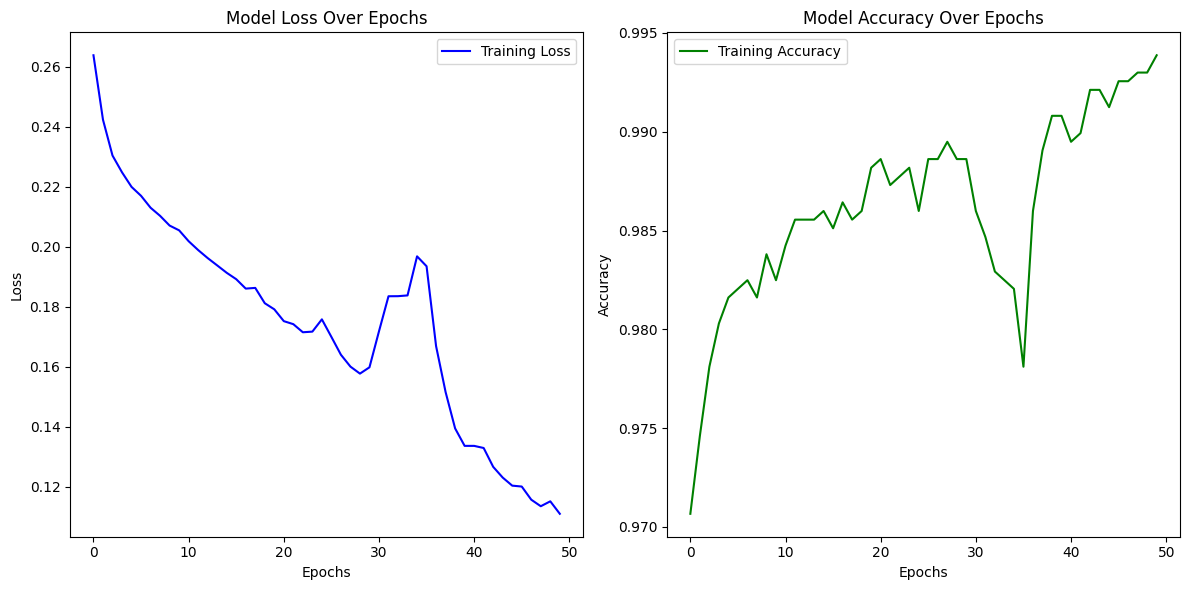


Generated Text with Temperature 0.5:
Once upon a time in in but day fair thou self is repair which eyes for eyes or thy pleasure now so your self but love you are no longer yours than you your

Generated Text with Temperature 1.0:
Once upon a time in should but i cold heir widow thou yet issue being thou couldst old times your sweet were shows in more more rights ere i his liker do o more

Generated Text with Temperature 1.5:


Once upon a time in should which youth is whose largess blunt gives for eyes for not plants beauty when thou false thy see find is painted do youth of resembling tell lo upon
Training history saved as 'training_history.json'.

Seed Text: Once upon a time
Generated Text:
Once upon a time in in not day of beauties do men but die in not fair by make too by if my brave might astronomy but debateth the stars of not heir unbless

Seed Text: In the distant future
Generated Text:
In the distant future devouring here their with tender green offend singleness for fading doth the place field beauty's live my where might yet i might thou store why not to earthly sire and

Seed Text: The knight embarked on
Generated Text:
The knight embarked on unbless i more treasure that thou self of thee a lives else so one in summer's addition thee sweet day in war an did night of time for life is

Seed Text: A long time ago
Generated Text:
A long time ago a yet yet all bear since resembling or that decay you s

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model

# Step 1: Save the Trained Model
model.save('text_gen_model.h5')  # Save the model
print("Model saved successfully!")

# Step 2: Reload the Model
loaded_model = load_model('text_gen_model.h5')
print("Model loaded successfully!")

# Step 3: Text Generation Function
def generate_text_from_loaded_model(seed_text, num_words):
    """
    Generate text using the loaded model.
    """
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')
        predicted_index = np.argmax(loaded_model.predict(token_list, verbose=0))
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Step 4: Generate Text Using the Reloaded Model
seed_text = "Once upon a time"
num_words_to_generate = 30  # Generate 30 words

# Generate text
generated_text = generate_text_from_loaded_model(seed_text, num_words_to_generate)
print("\nGenerated Text from Saved Model:")
print(generated_text)

"""**Code for Training Visualization and Fine-Tuning**
This will help you understand how the model performs over epochs and fine-tune the generated text for better results.

Training History:

Uses the History callback to record loss and accuracy during training.
Plots graphs to visualize how well the model is learning.
Fine-Tuning with Temperature:

Temperature controls randomness in predictions:
Low Temperature (0.5): Predictable and repetitive text.
High Temperature (1.5): Creative and diverse text, but may be less coherent.
Text Sampling:

Instead of always picking the most probable word, this code introduces randomness by sampling words based on probabilities.
Steps to Run
Run the code after training the model.
Visualize training performance through loss and accuracy graphs.
Experiment with different temperature values in text generation to find the best balance between coherence and creativity.
Why This is Important
Understand and debug training performance.
Generate more interesting and realistic text by adjusting randomness (temperature).
Fine-tune the generation process to match your desired output style.
"""

import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History

# Step 1: Retrain the Model with Training History
history = History()
model.fit(X, y, epochs=50, batch_size=32, callbacks=[history], verbose=2)

# Step 2: Plot Loss and Accuracy
plt.figure(figsize=(12, 6))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Step 3: Fine-Tune Text Generation
def generate_fine_tuned_text(seed_text, num_words, temperature=1.0):
    """
    Generates text using the model with temperature-based sampling.

    Parameters:
    - seed_text: Starting text.
    - num_words: Number of words to generate.
    - temperature: Controls randomness in prediction. Lower = deterministic, Higher = more random.
    """
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')
        predictions = model.predict(token_list, verbose=0).flatten()

        # Apply temperature to predictions
        predictions = np.log(predictions + 1e-8) / temperature
        predictions = np.exp(predictions) / np.sum(np.exp(predictions))

        # Sample the next word index
        predicted_index = np.random.choice(range(len(predictions)), p=predictions)

        # Find the corresponding word
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

# Step 4: Test Fine-Tuned Text Generation
seed_text = "Once upon a time"
num_words_to_generate = 30

# Experiment with different temperatures
for temp in [0.5, 1.0, 1.5]:
    print(f"\nGenerated Text with Temperature {temp}:")
    print(generate_fine_tuned_text(seed_text, num_words_to_generate, temperature=temp))

"""**Code for Saving History and Multiple Seed **"""

import json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: Save the Training History
history_dict = {
    'loss': history.history['loss'],
    'accuracy': history.history['accuracy'],
}

with open('training_history.json', 'w') as f:
    json.dump(history_dict, f)
print("Training history saved as 'training_history.json'.")

# Step 2: Load the Saved Model
model = load_model('text_gen_model.h5')  # Make sure the model is saved as 'text_gen_model.h5'

# Step 3: Test Text Generation with Multiple Seed Texts
def generate_text_with_multiple_seeds(seed_texts, num_words_to_generate=30):
    for seed_text in seed_texts:
        print(f"\nSeed Text: {seed_text}")
        generated_text = generate_text_from_loaded_model(seed_text, num_words_to_generate)
        print("Generated Text:")
        print(generated_text)

# Test with different seed texts
seed_texts = [
    "Once upon a time",
    "In the distant future",
    "The knight embarked on",
    "A long time ago",
    "The adventure began when"
]

# Run the test
generate_text_with_multiple_seeds(seed_texts, num_words_to_generate=30)

In [ ]:
#OPTIMISED TEXT GENERATION
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
text = """
1609

THE SONNETS

by William Shakespeare



                     1
  From fairest creatures we desire increase,
  That thereby beauty's rose might never die,
  But as the riper should by time decease,
  His tender heir might bear his memory:
  But thou contracted to thine own bright eyes,
  Feed'st thy light's flame with self-substantial fuel,
  Making a famine where abundance lies,
  Thy self thy foe, to thy sweet self too cruel:
  Thou that art now the world's fresh ornament,
  And only herald to the gaudy spring,
  Within thine own bud buriest thy content,
  And tender churl mak'st waste in niggarding:
    Pity the world, or else this glutton be,
    To eat the world's due, by the grave and thee.


                     2
  When forty winters shall besiege thy brow,
  And dig deep trenches in thy beauty's field,
  Thy youth's proud livery so gazed on now,
  Will be a tattered weed of small worth held:
  Then being asked, where all thy beauty lies,
  Where all the treasure of thy lusty days;
  To say within thine own deep sunken eyes,
  Were an all-eating shame, and thriftless praise.
  How much more praise deserved thy beauty's use,
  If thou couldst answer 'This fair child of mine
  Shall sum my count, and make my old excuse'
  Proving his beauty by succession thine.
    This were to be new made when thou art old,
    And see thy blood warm when thou feel'st it cold.


                     3
  Look in thy glass and tell the face thou viewest,
  Now is the time that face should form another,
  Whose fresh repair if now thou not renewest,
  Thou dost beguile the world, unbless some mother.
  For where is she so fair whose uneared womb
  Disdains the tillage of thy husbandry?
  Or who is he so fond will be the tomb,
  Of his self-love to stop posterity?
  Thou art thy mother's glass and she in thee
  Calls back the lovely April of her prime,
  So thou through windows of thine age shalt see,
  Despite of wrinkles this thy golden time.
    But if thou live remembered not to be,
    Die single and thine image dies with thee.


                     4
  Unthrifty loveliness why dost thou spend,
  Upon thy self thy beauty's legacy?
  Nature's bequest gives nothing but doth lend,
  And being frank she lends to those are free:
  Then beauteous niggard why dost thou abuse,
  The bounteous largess given thee to give?
  Profitless usurer why dost thou use
  So great a sum of sums yet canst not live?
  For having traffic with thy self alone,
  Thou of thy self thy sweet self dost deceive,
  Then how when nature calls thee to be gone,
  What acceptable audit canst thou leave?
    Thy unused beauty must be tombed with thee,
    Which used lives th' executor to be.


                     5
  Those hours that with gentle work did frame
  The lovely gaze where every eye doth dwell
  Will play the tyrants to the very same,
  And that unfair which fairly doth excel:
  For never-resting time leads summer on
  To hideous winter and confounds him there,
  Sap checked with frost and lusty leaves quite gone,
  Beauty o'er-snowed and bareness every where:
  Then were not summer's distillation left
  A liquid prisoner pent in walls of glass,
  Beauty's effect with beauty were bereft,
  Nor it nor no remembrance what it was.
    But flowers distilled though they with winter meet,
    Leese but their show, their substance still lives sweet.


                     6
  Then let not winter's ragged hand deface,
  In thee thy summer ere thou be distilled:
  Make sweet some vial; treasure thou some place,
  With beauty's treasure ere it be self-killed:
  That use is not forbidden usury,
  Which happies those that pay the willing loan;
  That's for thy self to breed another thee,
  Or ten times happier be it ten for one,
  Ten times thy self were happier than thou art,
  If ten of thine ten times refigured thee:
  Then what could death do if thou shouldst depart,
  Leaving thee living in posterity?
    Be not self-willed for thou art much too fair,
    To be death's conquest and make worms thine heir.


                     7
  Lo in the orient when the gracious light
  Lifts up his burning head, each under eye
  Doth homage to his new-appearing sight,
  Serving with looks his sacred majesty,
  And having climbed the steep-up heavenly hill,
  Resembling strong youth in his middle age,
  Yet mortal looks adore his beauty still,
  Attending on his golden pilgrimage:
  But when from highmost pitch with weary car,
  Like feeble age he reeleth from the day,
  The eyes (fore duteous) now converted are
  From his low tract and look another way:
    So thou, thy self out-going in thy noon:
    Unlooked on diest unless thou get a son.


                     8
  Music to hear, why hear'st thou music sadly?
  Sweets with sweets war not, joy delights in joy:
  Why lov'st thou that which thou receiv'st not gladly,
  Or else receiv'st with pleasure thine annoy?
  If the true concord of well-tuned sounds,
  By unions married do offend thine ear,
  They do but sweetly chide thee, who confounds
  In singleness the parts that thou shouldst bear:
  Mark how one string sweet husband to another,
  Strikes each in each by mutual ordering;
  Resembling sire, and child, and happy mother,
  Who all in one, one pleasing note do sing:
    Whose speechless song being many, seeming one,
    Sings this to thee, 'Thou single wilt prove none'.


                     9
  Is it for fear to wet a widow's eye,
  That thou consum'st thy self in single life?
  Ah, if thou issueless shalt hap to die,
  The world will wail thee like a makeless wife,
  The world will be thy widow and still weep,
  That thou no form of thee hast left behind,
  When every private widow well may keep,
  By children's eyes, her husband's shape in mind:
  Look what an unthrift in the world doth spend
  Shifts but his place, for still the world enjoys it;
  But beauty's waste hath in the world an end,
  And kept unused the user so destroys it:
    No love toward others in that bosom sits
    That on himself such murd'rous shame commits.


                     10
  For shame deny that thou bear'st love to any
  Who for thy self art so unprovident.
  Grant if thou wilt, thou art beloved of many,
  But that thou none lov'st is most evident:
  For thou art so possessed with murd'rous hate,
  That 'gainst thy self thou stick'st not to conspire,
  Seeking that beauteous roof to ruinate
  Which to repair should be thy chief desire:
  O change thy thought, that I may change my mind,
  Shall hate be fairer lodged than gentle love?
  Be as thy presence is gracious and kind,
  Or to thy self at least kind-hearted prove,
    Make thee another self for love of me,
    That beauty still may live in thine or thee.


                     11
  As fast as thou shalt wane so fast thou grow'st,
  In one of thine, from that which thou departest,
  And that fresh blood which youngly thou bestow'st,
  Thou mayst call thine, when thou from youth convertest,
  Herein lives wisdom, beauty, and increase,
  Without this folly, age, and cold decay,
  If all were minded so, the times should cease,
  And threescore year would make the world away:
  Let those whom nature hath not made for store,
  Harsh, featureless, and rude, barrenly perish:
  Look whom she best endowed, she gave thee more;
  Which bounteous gift thou shouldst in bounty cherish:
    She carved thee for her seal, and meant thereby,
    Thou shouldst print more, not let that copy die.


                     12
  When I do count the clock that tells the time,
  And see the brave day sunk in hideous night,
  When I behold the violet past prime,
  And sable curls all silvered o'er with white:
  When lofty trees I see barren of leaves,
  Which erst from heat did canopy the herd
  And summer's green all girded up in sheaves
  Borne on the bier with white and bristly beard:
  Then of thy beauty do I question make
  That thou among the wastes of time must go,
  Since sweets and beauties do themselves forsake,
  And die as fast as they see others grow,
    And nothing 'gainst Time's scythe can make defence
    Save breed to brave him, when he takes thee hence.


                     13
  O that you were your self, but love you are
  No longer yours, than you your self here live,
  Against this coming end you should prepare,
  And your sweet semblance to some other give.
  So should that beauty which you hold in lease
  Find no determination, then you were
  Your self again after your self's decease,
  When your sweet issue your sweet form should bear.
  Who lets so fair a house fall to decay,
  Which husbandry in honour might uphold,
  Against the stormy gusts of winter's day
  And barren rage of death's eternal cold?
    O none but unthrifts, dear my love you know,
    You had a father, let your son say so.


                     14
  Not from the stars do I my judgement pluck,
  And yet methinks I have astronomy,
  But not to tell of good, or evil luck,
  Of plagues, of dearths, or seasons' quality,
  Nor can I fortune to brief minutes tell;
  Pointing to each his thunder, rain and wind,
  Or say with princes if it shall go well
  By oft predict that I in heaven find.
  But from thine eyes my knowledge I derive,
  And constant stars in them I read such art
  As truth and beauty shall together thrive
  If from thy self, to store thou wouldst convert:
    Or else of thee this I prognosticate,
    Thy end is truth's and beauty's doom and date.


                     15
  When I consider every thing that grows
  Holds in perfection but a little moment.
  That this huge stage presenteth nought but shows
  Whereon the stars in secret influence comment.
  When I perceive that men as plants increase,
  Cheered and checked even by the self-same sky:
  Vaunt in their youthful sap, at height decrease,
  And wear their brave state out of memory.
  Then the conceit of this inconstant stay,
  Sets you most rich in youth before my sight,
  Where wasteful time debateth with decay
  To change your day of youth to sullied night,
    And all in war with Time for love of you,
    As he takes from you, I engraft you new.


                     16
  But wherefore do not you a mightier way
  Make war upon this bloody tyrant Time?
  And fortify your self in your decay
  With means more blessed than my barren rhyme?
  Now stand you on the top of happy hours,
  And many maiden gardens yet unset,
  With virtuous wish would bear you living flowers,
  Much liker than your painted counterfeit:
  So should the lines of life that life repair
  Which this (Time's pencil) or my pupil pen
  Neither in inward worth nor outward fair
  Can make you live your self in eyes of men.
    To give away your self, keeps your self still,
    And you must live drawn by your own sweet skill.


                     17
  Who will believe my verse in time to come
  If it were filled with your most high deserts?
  Though yet heaven knows it is but as a tomb
  Which hides your life, and shows not half your parts:
  If I could write the beauty of your eyes,
  And in fresh numbers number all your graces,
  The age to come would say this poet lies,
  Such heavenly touches ne'er touched earthly faces.
  So should my papers (yellowed with their age)
  Be scorned, like old men of less truth than tongue,
  And your true rights be termed a poet's rage,
  And stretched metre of an antique song.
    But were some child of yours alive that time,
    You should live twice in it, and in my rhyme.


                     18
  Shall I compare thee to a summer's day?
  Thou art more lovely and more temperate:
  Rough winds do shake the darling buds of May,
  And summer's lease hath all too short a date:
  Sometime too hot the eye of heaven shines,
  And often is his gold complexion dimmed,
  And every fair from fair sometime declines,
  By chance, or nature's changing course untrimmed:
  But thy eternal summer shall not fade,
  Nor lose possession of that fair thou ow'st,
  Nor shall death brag thou wand'rest in his shade,
  When in eternal lines to time thou grow'st,
    So long as men can breathe or eyes can see,
    So long lives this, and this gives life to thee.


                     19
  Devouring Time blunt thou the lion's paws,
  And make the earth devour her own sweet brood,
  Pluck the keen teeth from the fierce tiger's jaws,
  And burn the long-lived phoenix, in her blood,
  Make glad and sorry seasons as thou fleet'st,
  And do whate'er thou wilt swift-footed Time
  To the wide world and all her fading sweets:
  But I forbid thee one most heinous crime,
  O carve not with thy hours my love's fair brow,
  Nor draw no lines there with thine antique pen,
  Him in thy course untainted do allow,
  For beauty's pattern to succeeding men.
    Yet do thy worst old Time: despite thy wrong,
    My love shall in my verse ever live young.


                     20
  A woman's face with nature's own hand painted,
  Hast thou the master mistress of my passion,
  A woman's gentle heart but not acquainted
  With shifting change as is false women's fashion,
  An eye more bright than theirs, less false in rolling:
  Gilding the object whereupon it gazeth,
  A man in hue all hues in his controlling,
  Which steals men's eyes and women's souls amazeth.
  And for a woman wert thou first created,
  Till nature as she wrought thee fell a-doting,
  And by addition me of thee defeated,
  By adding one thing to my purpose nothing.
  But since she pricked thee out for women's pleasure,
  Mine be thy love and thy love's use their treasure.
    """

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
sequences = tokenizer.texts_to_sequences([text])[0]

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(f"Vocabulary Size: {vocab_size}")

Vocabulary Size: 877


In [ ]:
sequence_length = 10  # Number of words in each input sequence
X = []
y = []

In [ ]:
for i in range(sequence_length, len(sequences)):
    X.append(sequences[i-sequence_length:i])  # Input sequence
    y.append(sequences[i])  # Output word

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
model = Sequential([
    Embedding(vocab_size, 10, input_length=sequence_length),  # Embedding layer
    Bidirectional(GRU(128, return_sequences=False)),  # GRU with Bidirectional layer
    Dropout(0.3),
    Dense(vocab_size, activation='softmax')  # Output layer
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])
print("Model Compiled!")

Model Compiled!


In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, min_lr=0.0001)

In [ ]:
history = model.fit(X, y, epochs=200, batch_size=32, callbacks=[early_stop, lr_scheduler], verbose=2)

Epoch 1/200
72/72 - 8s - 106ms/step - accuracy: 0.0189 - loss: 6.6313 - learning_rate: 5.0000e-04
Epoch 2/200
72/72 - 4s - 55ms/step - accuracy: 0.0250 - loss: 6.0781 - learning_rate: 5.0000e-04
Epoch 3/200
72/72 - 2s - 22ms/step - accuracy: 0.0316 - loss: 6.0200 - learning_rate: 5.0000e-04
Epoch 4/200
72/72 - 2s - 23ms/step - accuracy: 0.0281 - loss: 5.9987 - learning_rate: 5.0000e-04
Epoch 5/200
72/72 - 2s - 23ms/step - accuracy: 0.0285 - loss: 5.9786 - learning_rate: 5.0000e-04
Epoch 6/200
72/72 - 4s - 56ms/step - accuracy: 0.0259 - loss: 5.9528 - learning_rate: 5.0000e-04
Epoch 7/200
72/72 - 4s - 49ms/step - accuracy: 0.0276 - loss: 5.9236 - learning_rate: 5.0000e-04
Epoch 8/200
72/72 - 3s - 35ms/step - accuracy: 0.0285 - loss: 5.8688 - learning_rate: 5.0000e-04
Epoch 9/200
72/72 - 3s - 35ms/step - accuracy: 0.0303 - loss: 5.7891 - learning_rate: 5.0000e-04
Epoch 10/200
72/72 - 3s - 46ms/step - accuracy: 0.0307 - loss: 5.6909 - learning_rate: 5.0000e-04
Epoch 11/200
72/72 - 3s - 40

In [ ]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

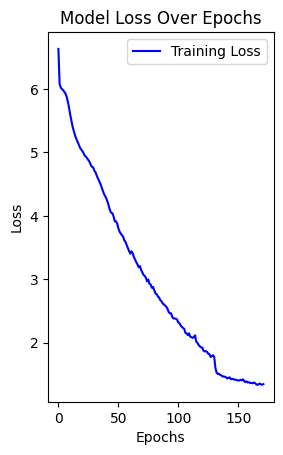

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

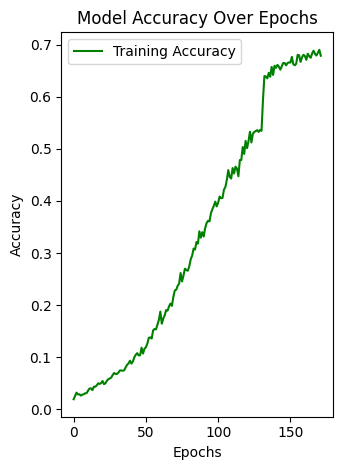

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
def generate_text_optimized(seed_text, num_words=50, temperature=1.0, top_k=40):
    """
    Generate text using temperature and top-k sampling.
    """
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=sequence_length, padding='pre')

        # Get the model's predictions
        predictions = model.predict(token_list, verbose=0)[0]

        # Apply temperature to the predictions to control randomness
        predictions = np.log(predictions + 1e-8) / temperature
        predictions = np.exp(predictions) / np.sum(np.exp(predictions))

        # Top-k sampling
        top_indices = predictions.argsort()[-top_k:][::-1]
        top_probs = predictions[top_indices]
        top_probs /= top_probs.sum()

        predicted_index = np.random.choice(top_indices, p=top_probs)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break
        seed_text += ' ' + output_word

    return seed_text

In [ ]:
seed_text = "The knight embarked on"
generated_text = generate_text_optimized(seed_text, num_words=50, temperature=0.8, top_k=30)
print("\nGenerated Text:")
print(generated_text)


Generated Text:
The knight embarked on blood 7 forsake this folly and honour stay spring 15 not perfection to times eternal to end thou uneared touches nature's that's live will bear so many change with women's shalt brood vial deserved thy sweet receiv'st erst it to presence thou temperate tattered audit lov'st to and love and


In [ ]:
#SENTIMENT ANALYSIS
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [ ]:
texts = ["I love this product", "This is the worst thing ever", "Absolutely amazing", "Not worth it", "Fantastic quality", "I hate this product", "It is really good", "This was very bad", "I did not like it", "I liked this product"]
labels = [1, 0, 1, 0, 1, 0, 1, 0, 0, 1]  # 1 = positive, 0 = negative

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
vocab_size = len(tokenizer.word_index) + 1
max_length = max(len(seq) for seq in sequences)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [ ]:
labels = np.array(labels)

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=10, input_length=max_length),
    LSTM(50),
    Dense(1, activation='sigmoid')
])
model.add(Dropout(0.25))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_sequences, labels, epochs=1000, batch_size=1, verbose=2)

Epoch 1/1000
10/10 - 2s - 204ms/step - accuracy: 0.4000 - loss: 2.3337
Epoch 2/1000
10/10 - 0s - 6ms/step - accuracy: 0.4000 - loss: 3.7857
Epoch 3/1000
10/10 - 0s - 5ms/step - accuracy: 0.7000 - loss: 1.9948
Epoch 4/1000
10/10 - 0s - 5ms/step - accuracy: 0.4000 - loss: 3.7712
Epoch 5/1000
10/10 - 0s - 6ms/step - accuracy: 0.4000 - loss: 3.7671
Epoch 6/1000
10/10 - 0s - 5ms/step - accuracy: 0.6000 - loss: 0.6239
Epoch 7/1000
10/10 - 0s - 7ms/step - accuracy: 0.4000 - loss: 3.7402
Epoch 8/1000
10/10 - 0s - 5ms/step - accuracy: 0.4000 - loss: 3.7271
Epoch 9/1000
10/10 - 0s - 6ms/step - accuracy: 0.3000 - loss: 5.2469
Epoch 10/1000
10/10 - 0s - 6ms/step - accuracy: 0.9000 - loss: 0.5944
Epoch 11/1000
10/10 - 0s - 5ms/step - accuracy: 0.6000 - loss: 2.0081
Epoch 12/1000
10/10 - 0s - 6ms/step - accuracy: 0.6000 - loss: 3.5525
Epoch 13/1000
10/10 - 0s - 6ms/step - accuracy: 0.8000 - loss: 0.3637
Epoch 14/1000
10/10 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.2546
Epoch 15/1000
10/10 - 0s - 

In [ ]:
test_text = "I hate this product"
test_seq = tokenizer.texts_to_sequences([test_text])
test_padded = pad_sequences(test_seq, maxlen=max_length, padding='post')
prediction = model.predict(test_padded)
print(prediction)
print(f"Sentiment: {'Positive' if prediction[0][0] > 0.5 else 'Negative'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
[[1.2309874e-06]]
Sentiment: Negative


In [2]:
# TEMPERATURE PREDICTION USING LSTM
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [3]:
temperature_data = np.array([30, 32, 35, 31, 29, 30, 28, 27, 26, 25, 24, 23, 22, 23, 25, 28, 30, 32, 34, 36, 37])

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_data_scaled = scaler.fit_transform(temperature_data.reshape(-1, 1))

In [5]:
sequence_length = 3
X = []
y = []

In [6]:
for i in range(sequence_length, len(temperature_data_scaled)):
    X.append(temperature_data_scaled[i-sequence_length:i, 0])  # Previous 3 days' temperatures
    y.append(temperature_data_scaled[i, 0])  # Next day's temperature

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [17]:
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(X.shape[1], 1)),  # LSTM layer with 50 units
    Dense(1)  # Output layer
])

In [19]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
model.fit(X, y, epochs=200, batch_size=16, verbose=2)

Epoch 1/200
2/2 - 2s - 820ms/step - loss: 0.2908
Epoch 2/200
2/2 - 0s - 16ms/step - loss: 0.2686
Epoch 3/200
2/2 - 0s - 17ms/step - loss: 0.2484
Epoch 4/200
2/2 - 0s - 16ms/step - loss: 0.2276
Epoch 5/200
2/2 - 0s - 17ms/step - loss: 0.2094
Epoch 6/200
2/2 - 0s - 16ms/step - loss: 0.1918
Epoch 7/200
2/2 - 0s - 29ms/step - loss: 0.1743
Epoch 8/200
2/2 - 0s - 29ms/step - loss: 0.1595
Epoch 9/200
2/2 - 0s - 31ms/step - loss: 0.1452
Epoch 10/200
2/2 - 0s - 29ms/step - loss: 0.1321
Epoch 11/200
2/2 - 0s - 30ms/step - loss: 0.1200
Epoch 12/200
2/2 - 0s - 29ms/step - loss: 0.1081
Epoch 13/200
2/2 - 0s - 21ms/step - loss: 0.0993
Epoch 14/200
2/2 - 0s - 20ms/step - loss: 0.0901
Epoch 15/200
2/2 - 0s - 29ms/step - loss: 0.0820
Epoch 16/200
2/2 - 0s - 29ms/step - loss: 0.0751
Epoch 17/200
2/2 - 0s - 16ms/step - loss: 0.0689
Epoch 18/200
2/2 - 0s - 16ms/step - loss: 0.0639
Epoch 19/200
2/2 - 0s - 16ms/step - loss: 0.0596
Epoch 20/200
2/2 - 0s - 29ms/step - loss: 0.0559
Epoch 21/200
2/2 - 0s - 16ms

In [13]:
last_sequence = temperature_data_scaled[-sequence_length:].reshape(1, sequence_length, 1)
predicted_temperature_scaled = model.predict(last_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


In [14]:
predicted_temperature = scaler.inverse_transform(predicted_temperature_scaled)
print(f"Predicted next day's temperature: {predicted_temperature[0][0]} °C")

Predicted next day's temperature: 36.09849166870117 °C


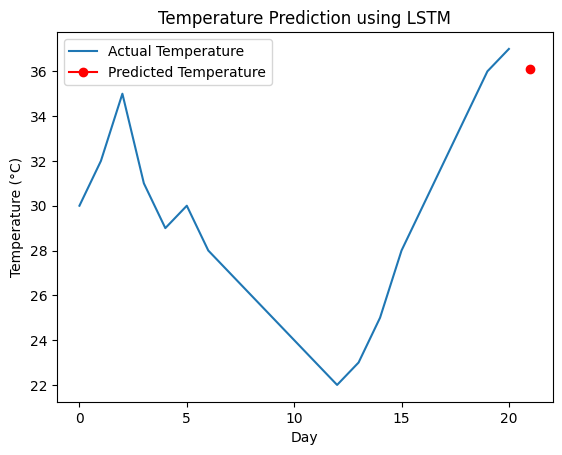

In [15]:
plt.plot(temperature_data, label='Actual Temperature')
plt.plot(np.arange(len(temperature_data), len(temperature_data)+1), predicted_temperature, label='Predicted Temperature', marker='o', color='red')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Prediction using LSTM')
plt.show()

In [37]:
# TEMPERATURE PREDICTION USING GRU (by me)
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler

In [38]:
temperature_data = np.array([30, 32, 35, 31, 29, 30, 28, 27, 26, 25, 24, 23, 22, 23, 25, 28, 30, 32, 34, 36, 37])

In [39]:
scaler = MinMaxScaler(feature_range=(0, 1))
temperature_data_scaled = scaler.fit_transform(temperature_data.reshape(-1, 1))

In [40]:
sequence_length = 3
X = []
y = []

In [41]:
for i in range(sequence_length, len(temperature_data_scaled)):
    X.append(temperature_data_scaled[i-sequence_length:i, 0])  # Previous 3 days' temperatures
    y.append(temperature_data_scaled[i, 0])  # Next day's temperature

In [42]:
X = np.array(X)
y = np.array(y)

In [43]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [ ]:
model = Sequential([
    GRU(50, return_sequences=False, input_shape=(X.shape[1], 1)),  # LSTM layer with 50 units
    Dense(1)  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(X, y, epochs=500, batch_size=16, verbose=2)

Epoch 1/500
2/2 - 2s - 966ms/step - loss: 0.2306
Epoch 2/500
2/2 - 0s - 16ms/step - loss: 0.1971
Epoch 3/500
2/2 - 0s - 16ms/step - loss: 0.1656
Epoch 4/500
2/2 - 0s - 15ms/step - loss: 0.1416
Epoch 5/500
2/2 - 0s - 16ms/step - loss: 0.1181
Epoch 6/500
2/2 - 0s - 17ms/step - loss: 0.0985
Epoch 7/500
2/2 - 0s - 16ms/step - loss: 0.0828
Epoch 8/500
2/2 - 0s - 15ms/step - loss: 0.0691
Epoch 9/500
2/2 - 0s - 15ms/step - loss: 0.0604
Epoch 10/500
2/2 - 0s - 29ms/step - loss: 0.0523
Epoch 11/500
2/2 - 0s - 15ms/step - loss: 0.0491
Epoch 12/500
2/2 - 0s - 16ms/step - loss: 0.0470
Epoch 13/500
2/2 - 0s - 21ms/step - loss: 0.0475
Epoch 14/500
2/2 - 0s - 16ms/step - loss: 0.0475
Epoch 15/500
2/2 - 0s - 16ms/step - loss: 0.0483
Epoch 16/500
2/2 - 0s - 28ms/step - loss: 0.0500
Epoch 17/500
2/2 - 0s - 32ms/step - loss: 0.0503
Epoch 18/500
2/2 - 0s - 27ms/step - loss: 0.0499
Epoch 19/500
2/2 - 0s - 15ms/step - loss: 0.0490
Epoch 20/500
2/2 - 0s - 17ms/step - loss: 0.0476
Epoch 21/500
2/2 - 0s - 16ms

In [ ]:
last_sequence = temperature_data_scaled[-sequence_length:].reshape(1, sequence_length, 1)
predicted_temperature_scaled = model.predict(last_sequence)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


In [ ]:
predicted_temperature = scaler.inverse_transform(predicted_temperature_scaled)
print(f"Predicted next day's temperature: {predicted_temperature[0][0]} °C")

Predicted next day's temperature: 35.429386138916016 °C


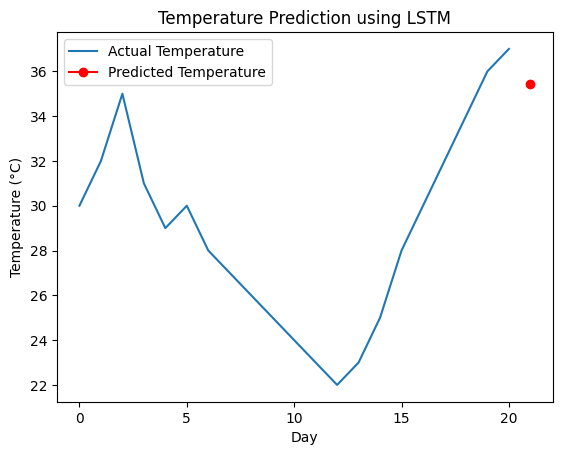

In [ ]:
plt.plot(temperature_data, label='Actual Temperature')
plt.plot(np.arange(len(temperature_data), len(temperature_data)+1), predicted_temperature, label='Predicted Temperature', marker='o', color='red')
plt.legend()
plt.xlabel('Day')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Prediction using LSTM')
plt.show()

In [136]:
# TEMPERATURE PREDICTION USING GRU (By Ma'am)
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [137]:
days = 100
np.random.seed(42)
temperature_data = np.sin(np.linspace(0, 20, days)) + np.random.normal(0, 0.1, days)
print(temperature_data)

[ 0.04967142  0.18682243  0.45790547  0.72193709  0.69954722  0.82347187
  1.09428401  1.06449817  0.95202373  1.02381195  0.85436368  0.74864708
  0.68158647  0.30149402  0.13571723  0.05483129 -0.19188926 -0.25716233
 -0.56563252 -0.78299051 -0.63602263 -0.91416189 -0.9575643  -1.1403026
 -1.04519152 -0.932289   -0.97273797 -0.69944296 -0.64647385 -0.44112521
 -0.28091664  0.16467022  0.17911721  0.26838014  0.63487196  0.58652243
  0.85666093  0.73298142  0.85152005  1.01937846  1.04823165  0.92658277
  0.79595168  0.64263213  0.36275348  0.25571629  0.08540311  0.03559826
 -0.2344813  -0.6329415  -0.59345039 -0.80813241 -0.94977843 -0.89750308
 -0.89316269 -0.90020503 -1.03392282 -0.89895041 -0.71762511 -0.50538349
 -0.47851836 -0.25931569 -0.15174     0.04058807  0.43626029  0.67099127
  0.68675052  0.92466362  0.95730511  0.91599461  1.03613054  1.13260585
  0.91421945  0.97593601  0.42583591  0.61036375  0.3557586   0.12191764
 -0.04041606 -0.44774246 -0.46021905 -0.57398165 -0.

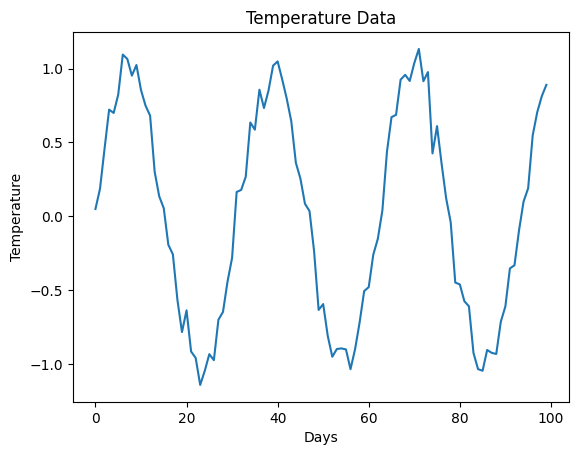

In [138]:
df = pd.DataFrame(temperature_data, columns=["Temperature"])
plt.plot(df)
plt.title('Temperature Data')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.show()

In [139]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

In [140]:
X = []
y = []

In [141]:
for i in range(7, len(scaled_data)):
    X.append(scaled_data[i-7:i, 0])  # Last 7 days
    y.append(scaled_data[i, 0])  # Next day's temperature

In [142]:
X = np.array(X)
y = np.array(y)

In [143]:
X = X.reshape(X.shape[0], X.shape[1], 1)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [145]:
model = Sequential([
    GRU(50, return_sequences=False, input_shape=(X_train.shape[1], 1)),  # GRU layer with 50 units
    Dense(1)  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [146]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=200, batch_size=4, verbose=2)

Epoch 1/200
19/19 - 2s - 110ms/step - loss: 0.2485
Epoch 2/200
19/19 - 0s - 7ms/step - loss: 0.0560
Epoch 3/200
19/19 - 0s - 8ms/step - loss: 0.0431
Epoch 4/200
19/19 - 0s - 6ms/step - loss: 0.0359
Epoch 5/200
19/19 - 0s - 7ms/step - loss: 0.0319
Epoch 6/200
19/19 - 0s - 7ms/step - loss: 0.0275
Epoch 7/200
19/19 - 0s - 7ms/step - loss: 0.0237
Epoch 8/200
19/19 - 0s - 8ms/step - loss: 0.0209
Epoch 9/200
19/19 - 0s - 7ms/step - loss: 0.0161
Epoch 10/200
19/19 - 0s - 6ms/step - loss: 0.0132
Epoch 11/200
19/19 - 0s - 6ms/step - loss: 0.0100
Epoch 12/200
19/19 - 0s - 7ms/step - loss: 0.0071
Epoch 13/200
19/19 - 0s - 7ms/step - loss: 0.0051
Epoch 14/200
19/19 - 0s - 6ms/step - loss: 0.0045
Epoch 15/200
19/19 - 0s - 7ms/step - loss: 0.0043
Epoch 16/200
19/19 - 0s - 8ms/step - loss: 0.0042
Epoch 17/200
19/19 - 0s - 7ms/step - loss: 0.0040
Epoch 18/200
19/19 - 0s - 6ms/step - loss: 0.0044
Epoch 19/200
19/19 - 0s - 6ms/step - loss: 0.0047
Epoch 20/200
19/19 - 0s - 7ms/step - loss: 0.0042
Epoch 2

In [147]:
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


In [148]:
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

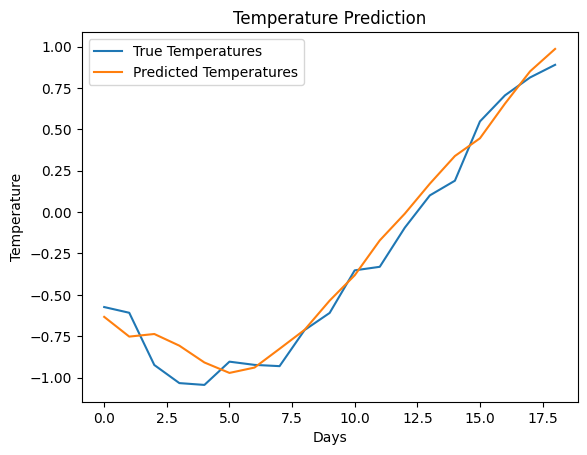

In [149]:
plt.plot(y_test, label='True Temperatures')
plt.plot(predictions, label='Predicted Temperatures')
plt.title('Temperature Prediction')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.legend()
plt.show()